In [ ]:
!nvidia-smi

Sat Jun 13 09:35:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Connecting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing the keras-retinanet library

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

%cd keras-retinanet/

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 5768 (delta 1), reused 0 (delta 0), pack-reused 5757
Receiving objects: 100% (5768/5768), 13.39 MiB | 14.84 MiB/s, done.
Resolving deltas: 100% (3866/3866), done.
/content/keras-retinanet


In [ ]:
!git checkout 415b0eb33f6bcd725ffacf81c3b0dcea2a642845

Note: checking out '415b0eb33f6bcd725ffacf81c3b0dcea2a642845'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 415b0eb Merge pull request #1386 from bickelmps/master


#Installing keras-retinanet

In [ ]:
!pip install .

!python setup.py build_ext --inplace

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169681 sha256=27b2a81e77a2ad6e0afd6b65d7a8a46c404c9d401f050c80dd8e57cbe09f47b6
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils


#Installing packages required by keras-retinanet 

In [ ]:
!pip install --upgrade keras
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 174kB 6.8MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 516.2MB 32kB/s 


# Importing keras-retinanet dependency packages 

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.makedirs("snapshots", exist_ok=True)

!rm -rf ./logs

os.makedirs("logs", exist_ok=True)

#Unzipping training data from google drive into colab

In [ ]:
import gdown

url = 'https://drive.google.com/u/1/uc?export=download&confirm=ALqy&id=1CnYAzZRVEDGK1TycGBb8SnMgyvzeZrie'
output = './train.zip'

gdown.download(url, output, False)

Downloading...
From: https://drive.google.com/u/1/uc?export=download&confirm=ALqy&id=1CnYAzZRVEDGK1TycGBb8SnMgyvzeZrie
To: /content/keras-retinanet/train.zip
10.2GB [03:47, 44.8MB/s]


'./train.zip'

In [ ]:
from zipfile import ZipFile

zip_ref = ZipFile('./train.zip', 'r')
zip_ref.extractall()
zip_ref.close()

!rm train.zip

#Processing Training Data


In [ ]:
train_for_actions = 3 #@param ["0", "1", "2", "3"] {type:"raw"}

actions_0 = ['CuttingMesocolon', 'CuttingVasDeferens', 'CuttingSeminalVesicle',
             'CuttingTissue', 'CuttingThread', 'CuttingProstate']
actions_1 = ['PullingVasDeferens', 'PullingSeminalVesicle', 'PullingTissue',
             'PullingProstate', 'PullingBladderNeck']
actions_2 = ['ClippingVasDeferens', 'ClippingTissue', 'ClippingSeminalVesicle',
             'ClippingBladderNeck']
actions_3 = ['SuckingBlood', 'SuckingSmoke', 'BaggingProstate', 
             'BladderNeckDissection', 'BladderAnastomosis']

actions = [actions_0, actions_1, actions_2, actions_3]

class_labels = []
with open("./train/obj.names") as f:
  for line in f:
    line = line.rstrip()
    class_labels.append(line)

FileNotFoundError: ignored

In [ ]:
from os import listdir
from os.path import join, getsize, splitext, isfile, exists
import pandas as pd
import re

DIR_PATH_1 = "./train/set1/"
DIR_PATH_2 = "./train/set2/"

IMAGE_WIDTH = 1920
IMAGE_HEIGHT = 1080

MAX_PREV_IMG = 1

dataset = dict()

prev_images = []

dataset["image_name"] = []
dataset["x_min"] = []
dataset["y_min"] = []
dataset["x_max"] = []
dataset["y_max"] = []               
dataset["class_name"] = []


dirFiles1 = sorted(listdir(DIR_PATH_1), key=lambda f: int(re.split(r"[._]", f)[-2]))
dirFiles2 = sorted(listdir(DIR_PATH_2), key=lambda f: int(re.split(r"[._]", f)[-2]))

dirFiles = dirFiles1 + dirFiles2

for file in dirFiles:
    
    full_path = join(DIR_PATH_1, file)
    
    if not exists(full_path):

        full_path = join(DIR_PATH_2, file)
    
    if file.endswith('.txt'):
    
        image_name = re.sub(r"txt$", "jpg", full_path)
        
        if (len(prev_images) > 0 and len(prev_images) % (MAX_PREV_IMG + 1) == 0):
            prev_images.pop(0)  

        if getsize(full_path) != 0:
           
            with open(full_path) as f:  
               
                for line in f:
                    
                    for img in prev_images:
                      
                      dataset["image_name"].append(img)
                      dataset["x_min"].append('')
                      dataset["y_min"].append('')
                      dataset["x_max"].append('')
                      dataset["y_max"].append('')                                     
                      dataset["class_name"].append('')

                    prev_images = []

                    line = line.rstrip()
                    line_data = line.split()
                    
                    box_width = int(round(float(line_data[3]) * IMAGE_WIDTH))
                    box_height = int(round(float(line_data[4]) * IMAGE_HEIGHT))
               
                    x_min = int(round(float(line_data[1]) * IMAGE_WIDTH)) - box_width // 2
                    y_min = int(round(float(line_data[2]) * IMAGE_HEIGHT)) - box_height // 2
                    x_max = x_min + box_width
                    y_max = y_min + box_height

                    x_min = 0 if x_min < 0 else x_min
                    y_min = 0 if y_min < 0 else y_min
                    x_max = IMAGE_WIDTH if x_max > IMAGE_WIDTH else x_max
                    y_max = IMAGE_HEIGHT if y_max > IMAGE_HEIGHT else y_max

                    class_name = class_labels[int(line_data[0])]
                    
                    dataset["image_name"].append(image_name)
                    dataset["x_min"].append(x_min)
                    dataset["y_min"].append(y_min)
                    dataset["x_max"].append(x_max)
                    dataset["y_max"].append(y_max)                                     
                    dataset["class_name"].append(class_name)
                    
        else:
           prev_images.append(image_name)
      

#Converting training data to keras-retinanet format

In [ ]:
from datetime import datetime

df = pd.DataFrame(dataset)

train_actions_df = df[df.class_name.isin(actions[train_for_actions])]
neg_train_actions_df = df[df.class_name == '']
neg_train_actions_df = neg_train_actions_df.sample(frac = min(1.0, len(train_actions_df) / len(neg_train_actions_df)))

train_df = pd.concat([train_actions_df, neg_train_actions_df])

In [ ]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [ ]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [ ]:
with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(actions[train_for_actions]):
    f.write('{},{}\n'.format(line,i))

In [ ]:
def show_image_objects(image_row):

  img_path = image_row.image_name

  if image_row.class_name != "":

    box = [
      image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
   
  if image_row.class_name != "":
    draw_box(draw, box, color=(255, 255, 0))
    draw_caption(draw, box=[box[0], box[1]], caption=image_row.class_name)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [ ]:
# show_image_objects(train_df.iloc[0])

#Loading Validation Data

In [ ]:
import gdown

url = 'https://drive.google.com/a/lgu.edu.pk/uc?id=1cYojEB4hJclmbnqy42R5lSpSDR5Ca7S_&export=download'
output = './val.zip'

gdown.download(url, output, False)

Downloading...
From: https://drive.google.com/a/lgu.edu.pk/uc?id=1cYojEB4hJclmbnqy42R5lSpSDR5Ca7S_&export=download
To: /content/keras-retinanet/val.zip
1.67GB [00:13, 128MB/s]


'./val.zip'

In [ ]:
from zipfile import ZipFile

zip_ref = ZipFile('./val.zip', 'r')
zip_ref.extractall()
zip_ref.close()

!rm val.zip

In [ ]:
class_labels = []

with open("./val/obj.names") as f:
    for line in f:
        line = line.rstrip()
        class_labels.append(line)

In [ ]:
from os import listdir
from os.path import join, getsize, splitext, isfile
import pandas as pd
import re

DIR_PATH = "./val/obj/"

IMAGE_WIDTH = 1920
IMAGE_HEIGHT = 1080

dataset = dict()

dataset["image_name"] = []
dataset["x_min"] = []
dataset["y_min"] = []
dataset["x_max"] = []
dataset["y_max"] = []
dataset["class_name"] = []

dirFiles = sorted(listdir(DIR_PATH), key=lambda f: int(re.split(r"[._]", f)[-2]))

for file in dirFiles:
    
    full_path = join(DIR_PATH, file)
    
    if isfile(full_path) and file.endswith('.txt'):
        
        if (getsize(full_path) > 0):
          
          with open(full_path) as f:
              
              for line in f:
                  
                  line = line.rstrip()
                  line_data = line.split()

                  image_name = DIR_PATH + splitext(file)[0] + '.jpg'
                  
                  box_width = int(round(float(line_data[3]) * IMAGE_WIDTH))
                  box_height = int(round(float(line_data[4]) * IMAGE_HEIGHT))
                
                  x_min = int(round(float(line_data[1]) * IMAGE_WIDTH)) - box_width // 2
                  y_min = int(round(float(line_data[2]) * IMAGE_HEIGHT)) - box_height // 2
                  x_max = x_min + box_width
                  y_max = y_min + box_height
                  
                  x_min = 0 if x_min < 0 else x_min
                  y_min = 0 if y_min < 0 else y_min
                  x_max = IMAGE_WIDTH if x_max > IMAGE_WIDTH else x_max
                  y_max = IMAGE_HEIGHT if y_max > IMAGE_HEIGHT else y_max

                  class_name = class_labels[int(line_data[0])]
                  
                  dataset["image_name"].append(image_name)
                  dataset["x_min"].append(x_min)
                  dataset["y_min"].append(y_min)
                  dataset["x_max"].append(x_max)
                  dataset["y_max"].append(y_max)                                     
                  dataset["class_name"].append(class_name)
      
        else:

          image_name = DIR_PATH + splitext(file)[0] + '.jpg'
          dataset["image_name"].append(image_name)
          dataset["x_min"].append('')
          dataset["y_min"].append('')
          dataset["x_max"].append('')
          dataset["y_max"].append('')                                     
          dataset["class_name"].append('')


In [ ]:
from datetime import datetime

df = pd.DataFrame(dataset)

val_actions_df = df[df.class_name.isin(actions[train_for_actions])]

neg_val_actions_df = df[df.class_name == '']
neg_val_actions_df = neg_val_actions_df.sample(frac = min(0.5, len(val_actions_df) / len(neg_val_actions_df)))

val_df = pd.concat([val_actions_df, neg_val_actions_df]).sample(frac = 0.35)

In [ ]:
ANNOTATIONS_FILE = 'val_annotations.csv'

In [ ]:
val_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

# Training

In [ ]:
from os import makedirs

backbone = 'resnet101' #@param ["resnet50", "resnet101", "resnet152"]

snapshot_path = "../drive/My Drive/Colab Notebooks/snapshots/{}/{}".format(backbone, train_for_actions)

makedirs(snapshot_path, exist_ok=True)

#snapshot_file = os.path.join(snapshot_path, sorted(os.listdir(snapshot_path), reverse=True)[0])

# !cp "{snapshot_file}" ./snapshots

# snapshot_file = 'snapshots/' + snapshot_file.split('/')[-1]

import re
# recent_epoch = int(re.split(r'[._]', snapshot_file)[-2])

# print(snapshot_file)
# print(recent_epoch)

In [ ]:
# --weights "{snapshot_file}"
# --freeze-backbone \
# --initial-epoch {recent_epoch} \
# --compute-val-loss \

!keras_retinanet/bin/train.py \
  --random-transform \
  --freeze-backbone \
  --backbone "{backbone}" \
  --snapshot "{snapshot_file}" \
  --weighted-average \
  --snapshot-path "{snapshot_path}" \
  --batch-size 2 \
  --steps 2000 \
  --image-min-side 800 \
  --image-max-side 1422 \
  --compute-val-loss \
  --epochs 8 \
  csv annotations.csv classes.csv --val-annotations val_annotations.csv

Using TensorFlow backend.
Creating model, this may take a second...
2020-06-13 12:48:25.110888: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-13 12:48:25.141627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-13 12:48:25.142508: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-06-13 12:48:25.145555: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-13 12:48:25.163421: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas

 # Loading the trained model

In [ ]:
#snapshot_file = os.path.join(snapshot_path, sorted(os.listdir(snapshot_path), reverse=True)[0])
#!cp "{snapshot_file}" ./snapshots

model_path = os.path.join(snapshot_path, sorted(os.listdir(snapshot_path), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name=backbone)
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

../drive/My Drive/Colab Notebooks/snapshots/resnet101/3/resnet101_csv_05.h5


Using TensorFlow backend.


TypeError: ignored

# Predictions

In [ ]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image, min_side = 288, max_side = 512)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [ ]:
THRES_SCORE = 0.5

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)


In [ ]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  all_boxes = val_df.loc[val_df['image_name'] == img_path]
  for index, row in all_boxes.iterrows():
    true_box = [row.x_min, row.y_min, row.x_max, row.y_max]
    draw_box(draw, true_box, color=(255, 255, 0))
    caption = "{}".format(row.class_name)
    draw_caption(draw, [row.x_min, row.y_min + row.y_max - row.y_min, row.x_max, row.y_max ], caption)

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [ ]:
show_detected_objects(val_df.iloc[0])

In [ ]:
#--max-detections 5 \
!/content/keras-retinanet/keras_retinanet/bin/evaluate.py \
  --convert-model \
  --save-path '/content/keras-retinanet/images' \
  --backbone 'resnet152' \
  --image-min-side 288 \
  --image-max-side 512 \
  --score-threshold 0.4 \
  --iou-threshold 0.5 \
  csv val_annotations.csv classes.csv '/content/drive/My Drive/Colab Notebooks/snapshots/resnet152_csv_31.h5'

In [ ]:
!zip -r ./eval.zip ./logs

In [ ]:
!ps -aux|grep python

In [ ]:
#!kill -9 120
!rm -r ./logs

# Loading Test Data

In [ ]:
import gdown

url = 'https://drive.google.com/a/lgu.edu.pk/uc?id=1gho-oGzUbNgnZmBZ2GDKWWOcs1VI-z0O&export=download'
output = './test.zip'

gdown.download(url, output, False)

Downloading...
From: https://drive.google.com/a/lgu.edu.pk/uc?id=1gho-oGzUbNgnZmBZ2GDKWWOcs1VI-z0O&export=download
To: /content/keras-retinanet/test.zip
1.48GB [00:38, 38.1MB/s]


'./test.zip'

In [ ]:
from zipfile import ZipFile

zip_ref = ZipFile('./test.zip', 'r')
zip_ref.extractall()
zip_ref.close()

!rm test.zip

In [ ]:
def generate_submission_file( images_paths, parent_directory, dest_file_path='submission.txt', score_threshold=0.05, min_side=288, max_side=512):

  image_min_side = min_side
  image_max_side = max_side

  with open(dest_file_path, 'w') as submission_file:

    for image_path in images_paths:
      
      image = read_image_bgr(parent_directory + "/" + image_path)
      image = preprocess_image(image.copy())
      image, scale = resize_image(image, min_side = image_min_side, max_side = image_max_side)

      boxes, scores, labels = model.predict_on_batch(
        np.expand_dims(image, axis=0)
      )

      for box, score, label in zip(boxes[0], scores[0], labels[0]):
        
        if score < score_threshold:
            break

        box[0] /= image_max_side
        box[1] /= image_min_side
        box[2] /= image_max_side
        box[3] /= image_min_side

        submission_file.write(f"{image_path} {box[0]:.6f} {box[1]:.6f} " +
                              f"{box[2]:.6f} {box[3]:.6f} {score:.6f} {label}\n")


In [ ]:
from os import listdir
import re

DIR_PATH = "./test"

test_images_paths = sorted(listdir(DIR_PATH), key=lambda f: int(re.split(r"[._]", f)[-2]))

In [ ]:
generate_submission_file(test_images_paths, DIR_PATH)

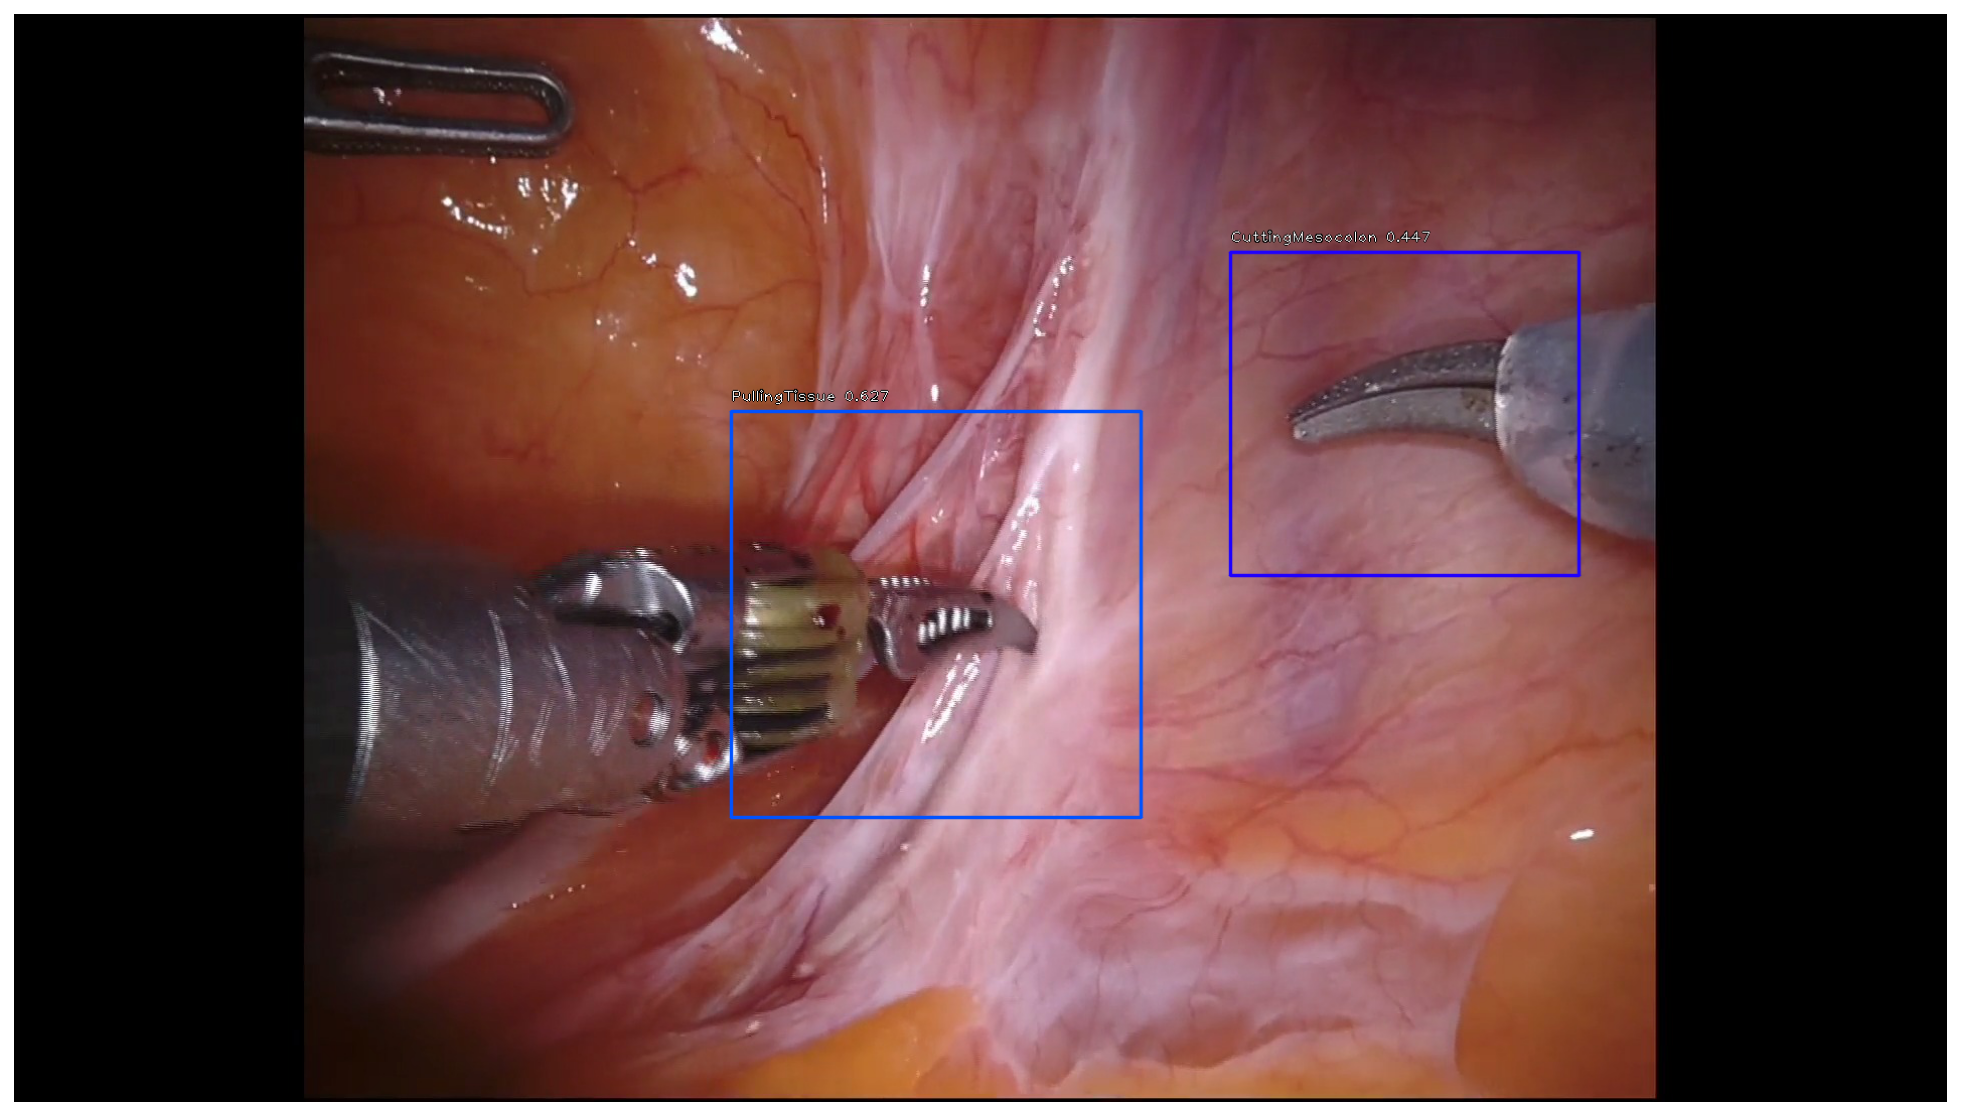

In [ ]:
show_detected_objects(DIR_PATH + "/" + test_images_paths[0], score_thres=0.3, min_side=232, max_side=512)